# Minimal example for working with measurement wheel data

Import the worklab module

In [1]:
import os
import worklab as wl

Import the data with `com.load()` or the device specific load function:

In [2]:
filename = os.getcwd()
filename = os.path.join(os.path.split(filename)[0], 'example_data', 'Optipush_example.data')
mw_data = wl.com.load(filename)
print("Measurement wheel data is stored in a: ", type(mw_data))


Initializing loading for C:\Users\rick_\Development\worklab2\example_data\Optipush_example.data ...
File identified as Optipush datafile. Attempting to load ...
Data loaded!

Measurement wheel data is stored in a:  <class 'pandas.core.frame.DataFrame'>


The DataFrame contains all the information from the file, but nothing extra:

In [3]:
mw_data.columns

Index(['time', 'fx', 'fy', 'fz', 'mx', 'my', 'torque', 'angle'], dtype='object')

Before getting more infos it would be a good idea to apply some filtering:

In [4]:
mw_data = wl.kin.filter_mw(mw_data)

Now let's get more infos:

In [5]:
mw_data = wl.kin.process_mw(mw_data)
mw_data.head()

,time,fx,fy,fz,mx,my,torque,angle,aspeed,speed,dist,acc,ftot,uforce,force,power,work
0,0.000,2.838031,1.753805,-4.058034,0.004851,0.005135,-0.054472,3.673093,3.352298,1.039212,0.000000,2.535617,5.253370,-0.198079,-0.175715,-0.182605,-0.000913
1,0.005,2.401395,1.666210,-4.385999,-0.002135,0.004741,-0.058072,3.689854,3.393195,1.051890,0.005228,3.594796,5.270667,-0.211171,-0.187329,-0.197050,-0.000985
2,0.010,1.963322,1.620943,-4.642096,-0.006774,0.002821,-0.060339,3.707025,3.468259,1.075160,0.010545,4.264677,5.294445,-0.219414,-0.194642,-0.209271,-0.001046
3,0.015,1.527743,1.645536,-4.771329,-0.007243,-0.001333,-0.060383,3.724537,3.530765,1.094537,0.015970,3.537893,5.273269,-0.219573,-0.194782,-0.213197,-0.001066
4,0.020,1.104789,1.748478,-4.743367,-0.002454,-0.007348,-0.058016,3.742333,3.582384,1.110539,0.021482,2.901078,5.174675,-0.210967,-0.187148,-0.207835,-0.001039


That's more like it!

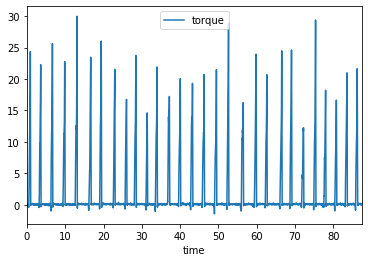

In [6]:
mw_data.plot("time", "torque");

Let's see if we can find some pushes in these data:

In [7]:
pushes = wl.kin.push_by_push_mw(mw_data)
print(f"There are {len(pushes)} complete pushes in the data")
pushes.head()

There are 29 complete pushes in the data


,stop,start,peak,tstart,tstop,tpeak,cangle,ptime,meanpower,maxpower,meantorque,maxtorque,meanforce,maxforce,work,feff,slope,ctime,reltime
0,195,97,176,0.485,0.975,0.88,1.676823,0.490,36.376315,94.426828,10.559981,24.357933,38.399932,88.574302,18.006276,55.197071,61.665653,2.695,18.181818
1,735,636,718,3.180,3.675,3.59,1.630329,0.495,36.170961,86.937413,10.449778,22.283936,37.999192,81.032495,18.085480,52.638096,54.351063,3.095,15.993538
2,1349,1255,1330,6.275,6.745,6.65,1.601879,0.470,45.783597,102.833058,12.917944,25.623400,46.974343,93.175999,21.747209,63.410359,68.329066,3.130,15.015974
3,1994,1881,1972,9.405,9.970,9.86,1.781313,0.565,33.413155,86.508159,10.060917,22.747502,36.585153,82.718191,19.045498,56.930325,49.994511,3.190,17.711599
4,2629,2519,2612,12.595,13.145,13.06,1.897524,0.550,43.382667,118.642142,12.244082,29.976050,44.523935,109.003817,24.077380,61.715078,64.464623,3.590,15.320334


You can achieve the exact same thing using the `auto_process` function. Which chains the above operations into one monolithic function and returns the data and the pushes, as such:
```python
mw_data, pushes = wl.kin.auto_process(mw_data, *args, **kwargs)
```

Now make a christmas tree!

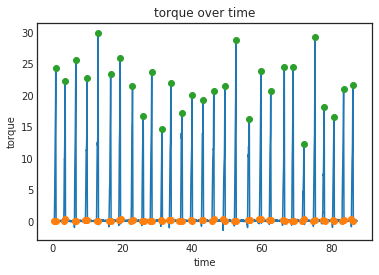

In [8]:
wl.plots.plot_pushes(mw_data, pushes);

Magnificent! 😍